<a href="https://colab.research.google.com/github/Abrar-2024/week4/blob/main/Copy_of_Task_2_Convolutional_Neural_Networks_(CNN)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [1]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
  0% 0.00/5.21M [00:00<?, ?B/s]
100% 5.21M/5.21M [00:00<00:00, 121MB/s]
Archive:  parkinglot-occupation.zip
  inflating: ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_01a29d413e3642d39e11414dc6e95501_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_023ee6f9ea20407da126475ef5bfe567_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_03fffe90162c4e06be43e47f34d9e83a_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_04c6ff9e977d4f59bbf963bfb97f6872_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_0571fcbaa9b94ddfaf5c65edad33e59e_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_064a5abf3c7d47f9942f77da2a2af7e7_empty.jpg  
  inflating: ParkingLot_Occupation/test/empty/roi_066690ec6e534d9fbe6be7f9acffb48d_empty.jpg  
  inflating: ParkingLot_Occupation/

## Import Libraries

In [2]:
import os
import numpy as np
import keras
import tensorflow as tf
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from keras import models
import tensorflow_datasets as tfds

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [3]:
num_skipped = 0
for folder_name in ("empty", "occupied"):
    folder_path = os.path.join("/content/ParkingLot_Occupation/train", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

In [4]:
num_skipped = 0
for folder_name in ("empty", "occupied"):
    folder_path = os.path.join("/content/ParkingLot_Occupation/test", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

In [6]:
image_size = (80, 80)
batch_size = 50

dataset  = keras.utils.image_dataset_from_directory(
    "/content/ParkingLot_Occupation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1726 files belonging to 2 classes.


## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [7]:
#Split dataset into train 70%, val 15% and test 15%

# Determine the length of the dataset
dataset_size = len(dataset)

# Calculate sizes for train, validation, and test sets
train_size = int(0.7 * dataset_size)
val_size = int(0.15 * dataset_size)
test_size = int(0.15 * dataset_size)

# Shuffle the dataset, providing a buffer size
# A good rule of thumb is to set the buffer size to the length of the dataset
full_dataset = dataset.shuffle(buffer_size=dataset_size)

train_ds = full_dataset.take(train_size)
# Skip the elements used for training to get the remaining for validation and test
remaining_ds = full_dataset.skip(train_size)
val_ds = remaining_ds.take(val_size)
test_ds = remaining_ds.skip(val_size)

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [8]:
model = models.Sequential([
                            layers.Rescaling((1./ 255), input_shape=(80, 80, 3)), # Normalization
                            layers.Conv2D(50, 3, padding='same', activation='relu'),
                            layers.MaxPooling2D(),
                            layers.SeparableConv2D(32, 3, padding='same', activation='relu'),
                            layers.MaxPooling2D(),
                            layers.Conv2D(64, 3, padding='same', activation='relu'),
                            layers.MaxPooling2D(),
                            layers.SeparableConv2D(128, 3, padding='same', activation='relu'),
                            layers.MaxPooling2D(),
                            layers.Conv2D(25, 3, padding='same', activation='relu'),
                            layers.MaxPooling2D(),
                            layers.Flatten(),
                            layers.Dense(28, activation='relu'),
                            layers.Dense(1, activation='sigmoid')
                          ])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 80, 80, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 80, 80, 50)          │           1,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 40, 40, 50)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d (SeparableConv2D)   │ (None, 40, 40, 32)          │           2,082 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 20, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ separable_conv2d_1 (SeparableConv2D) │ (None, 10, 10, 128)         │           8,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 25)            │          28,825 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 25)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 28)                  │           2,828 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              29 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,556 (244.36 KB)

 Trainable params: 62,556 (244.36 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [9]:
history = model.fit(train_ds, batch_size=100, epochs=10, validation_data=val_ds)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 631ms/step - accuracy: 0.7854 - loss: 0.6427 - val_accuracy: 0.7840 - val_loss: 0.5255
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 627ms/step - accuracy: 0.8120 - loss: 0.4944 - val_accuracy: 0.7840 - val_loss: 0.5261
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 632ms/step - accuracy: 0.7830 - loss: 0.5267 - val_accuracy: 0.7600 - val_loss: 0.5762
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 639ms/step - accuracy: 0.7965 - loss: 0.5134 - val_accuracy: 0.7920 - val_loss: 0.5271
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 618ms/step - accuracy: 0.8092 - loss: 0.4911 - val_accuracy: 0.8000 - val_loss: 0.5033
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 600ms/step - accuracy: 0.8125 - loss: 0.4854 - val_accuracy: 0.7760 - val_loss: 0.5323
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 675ms/step - accuracy: 0.8358 - loss: 0.4575 - val_accuracy: 0.8080 - val_loss: 0.4978
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 616ms/step - accuracy: 0.8043 - loss: 0.5003 - val_accu

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [12]:
#Model evaluating
model.evaluate(test_ds)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 231ms/step - accuracy: 0.7768 - loss: 0.5327


[0.5429217219352722, 0.7699999809265137]

## Make Predictions
Use the trained model to make predictions on new or unseen parkinglot images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [10]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
This image is 30.85% cat and 69.15% dog.


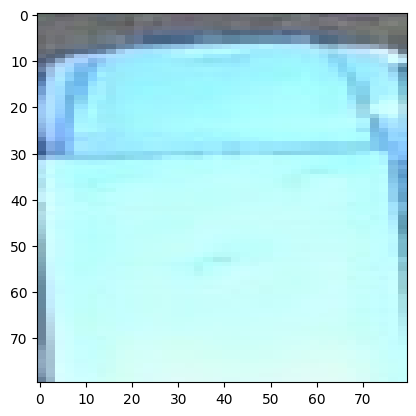

In [11]:
img = keras.utils.load_img("/content/ParkingLot_Occupation/test/occupied/roi_004bfe83116849df90430e501a2c8fd0_occupied.jpg", target_size=image_size)
plt.imshow(img)

img_array = keras.utils.img_to_array(img)
img_array = keras.ops.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
score = float(keras.ops.sigmoid(predictions[0][0]))
print(f"This image is {100 * (1 - score):.2f}% cat and {100 * score:.2f}% dog.")

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

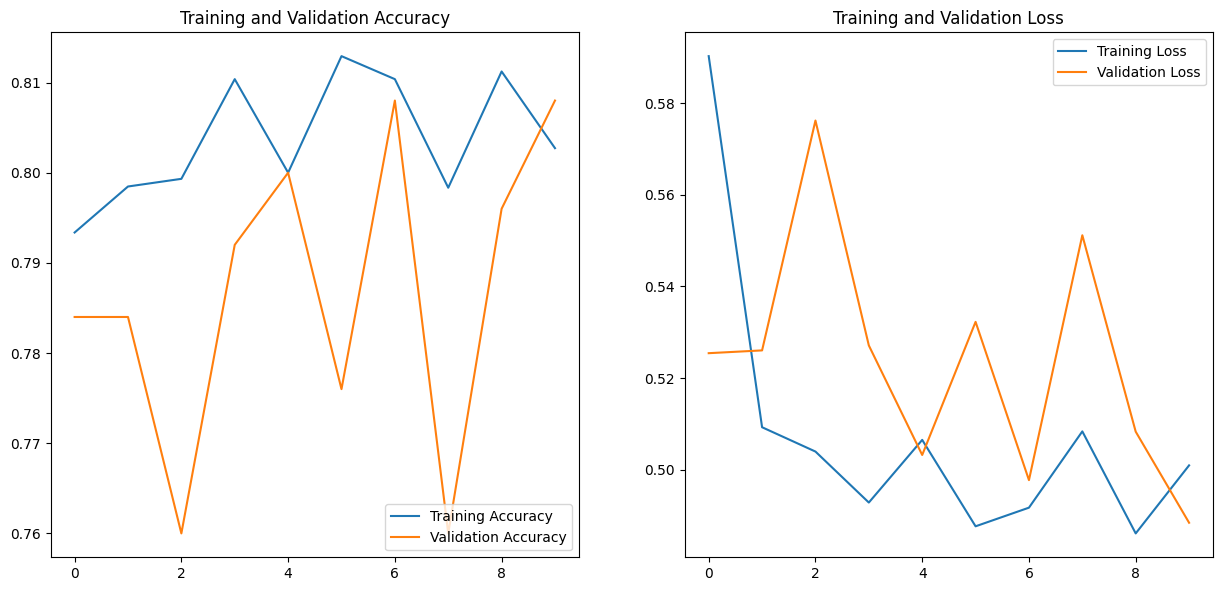

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Save the Model
Save the trained CNN model for submission.

In [ ]:
model.save('parking_classifier.keras')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying parkinglot?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here: